# 0.0 Importações

## Importando bibliotecas

In [146]:
#manipulação de dados
import pandas as pd

#Calculos
import math
import numpy as np

#Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

#utilidades
import inflection
from IPython.display import Image
import datetime

## 0.2 Carregando os dados

In [5]:
df_vendas_raw = pd.read_csv("archive/train.csv", low_memory=False)
df_lojas_raw = pd.read_csv("archive/store.csv", low_memory=False)
#o parâmetro low memory indica que o seu pc tem pouca memoria, e a funcao le o arquivo por chunks

#merge
df_raw = pd.merge(df_vendas_raw, df_lojas_raw, how="left", on="Store")

In [6]:
df_raw.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


# 1.0 Descrição dos dados

## 1.1 Renomeando colunas

In [9]:
df1 = df_raw.copy()

In [10]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

#trocar as palavras para snakecase onde elas são separadas por underlines
snakecase = lambda x: inflection.underscore( x )

cols_new = list(map(snakecase, cols_old))

df1.columns = cols_new

## 1.2 Dimensões dos dados

In [12]:
print(f"Linhas: {df1.shape[0]}")
print(f"Colunas: {df1.shape[1]}")

Linhas: 1017209
Colunas: 18


## 1.3 Tipo das colunas

In [14]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [15]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Checagem de N/As

In [17]:
df1.isna().sum() #/ df1.shape[0] #porcentagem

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Preenchendo NAs

In [19]:
#competition_distance -> trocar por uma distancia maior do que exista no dataset para indicar que não h'a competidores

df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

#competition_open_since_month -> vamos usar a data de abertura da loja para indicar

df1['competition_open_since_month'] = df1.apply(lambda x: x["date"].month if math.isnan(x["competition_open_since_month"]) else x['competition_open_since_month'], axis=1)

#competition_open_since_year

df1['competition_open_since_year'] = df1.apply(lambda x: x["date"].year if math.isnan(x["competition_open_since_year"]) else x['competition_open_since_year'], axis=1)

#promo2_since_week -> se for NA, a loja não participou da promoção, vamos colocar a data do date, e na feature engeneering vamos remover

df1['promo2_since_week'] = df1.apply(lambda x: x["date"].week if math.isnan(x["promo2_since_week"]) else x['promo2_since_week'], axis=1)

#promo2_since_year

df1['promo2_since_year'] = df1.apply(lambda x: x["date"].year if math.isnan(x["promo2_since_year"]) else x['promo2_since_year'], axis=1)



In [20]:
#promo_interval
month_map = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

df1['promo_interval'].fillna(0, inplace=True)

df1["month_map"] = df1["date"].dt.month.map(month_map) #Tradução da data em mês para indicar se a loja estava em promoção

In [24]:
df1['is_promo'] = df1[["promo_interval", "month_map"]].apply(lambda x: 0 if x["promo_interval"] == 0 else 1 if x["month_map"] in x["promo_interval"].split(',') else 0, axis=1)

In [26]:
df1.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,31.0,2015.0,0,Jul,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Jul,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",Jul,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,31.0,2015.0,0,Jul,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,31.0,2015.0,0,Jul,0


## 1.6 Mudança nos tipos

In [31]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [33]:
df1["competition_open_since_month"] = df1["competition_open_since_month"].astype( int )
df1["competition_open_since_year"] = df1["competition_open_since_year"].astype( int )

df1["promo2_since_week"] = df1["promo2_since_week"].astype(int)
df1["promo2_since_year"] = df1["promo2_since_year"].astype(int)

In [35]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7 Descrição dos dados

In [44]:
df_num = df1.select_dtypes( include=["int64", "float64"] )
df_cat = df1.select_dtypes( exclude=["int64", "float64", "datetime64[ns]"] )

### 1.7.1 Dados numéricos

In [51]:
medias = pd.DataFrame( df_num.apply( np.mean ) ).T #.t serve para transpor
medianas = pd.DataFrame( df_num.apply( np.median ) ).T 

In [59]:
desvio_padrao = pd.DataFrame( df_num.apply( np.std ) ).T
minimo = pd.DataFrame( df_num.apply( min ) ).T
maximo = pd.DataFrame( df_num.apply( max ) ).T
intervalo = pd.DataFrame( df_num.apply(lambda x: x.max() - x.min()) ).T
skew = pd.DataFrame( df_num.apply( lambda x: x.skew())).T #Quanto mais pr'oxima a 0, mais tende a curva normal
kurtosis = pd.DataFrame( df_num.apply(lambda x: x.kurtosis() ) ).T

In [65]:
metricas_numericas = pd.concat( [minimo, maximo, intervalo, medias, medianas, desvio_padrao, skew, kurtosis] ).T.reset_index()
metricas_numericas.columns = (["atributos","minimo","maximo","intervalo","medias","medianas","desvio_padrao","skew","kurtosis"])

In [67]:
metricas_numericas

,atributos,minimo,maximo,intervalo,medias,medianas,desvio_padrao,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


<Axes: xlabel='sales', ylabel='Count'>

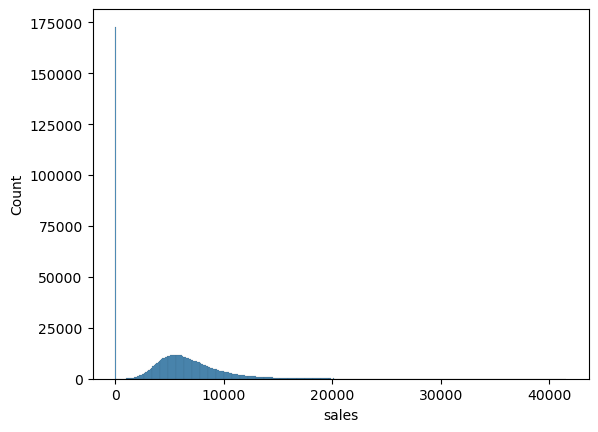

In [94]:
sns.histplot(df_num["sales"])

## 1.7.2 Dados categoricos

In [92]:
df_cat.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<Axes: xlabel='assortment', ylabel='sales'>

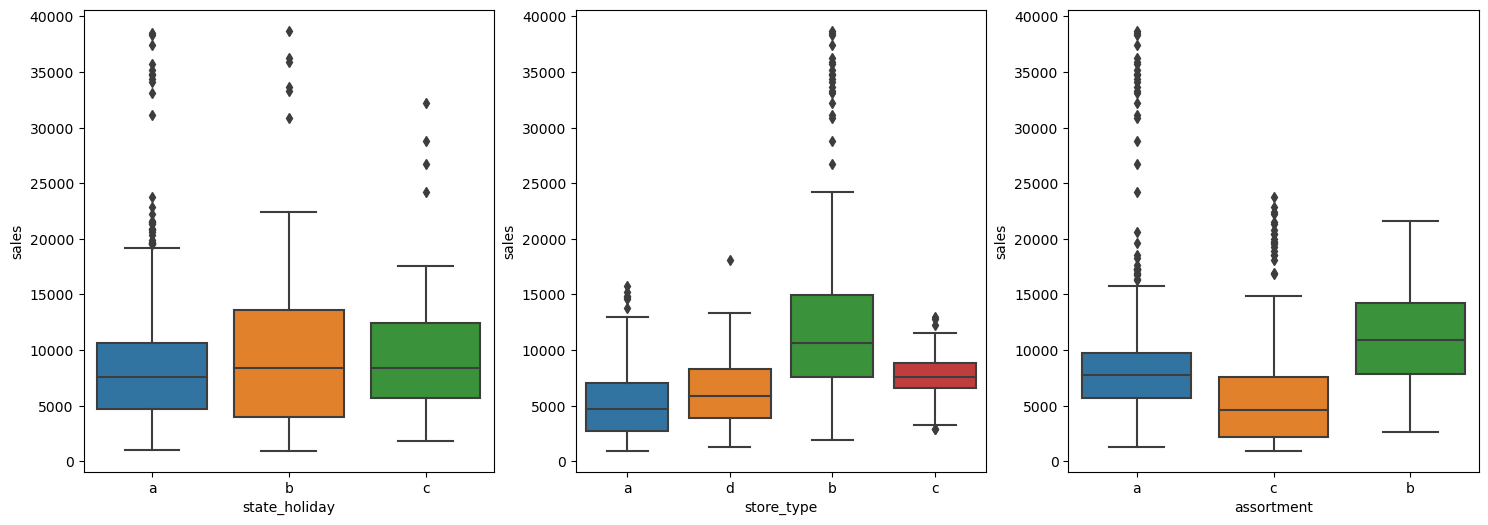

In [106]:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
sns.boxplot(x = "state_holiday", y = "sales", data=aux1)

plt.subplot(1,3,2)
sns.boxplot(x = "store_type", y = "sales", data=aux1)

plt.subplot(1,3,3)
sns.boxplot(x = "assortment", y = "sales", data=aux1)

# 2.0 Feature Engeneering

In [135]:
df2 = df1.copy()

## 2.1 Mapa mental de hipoteses

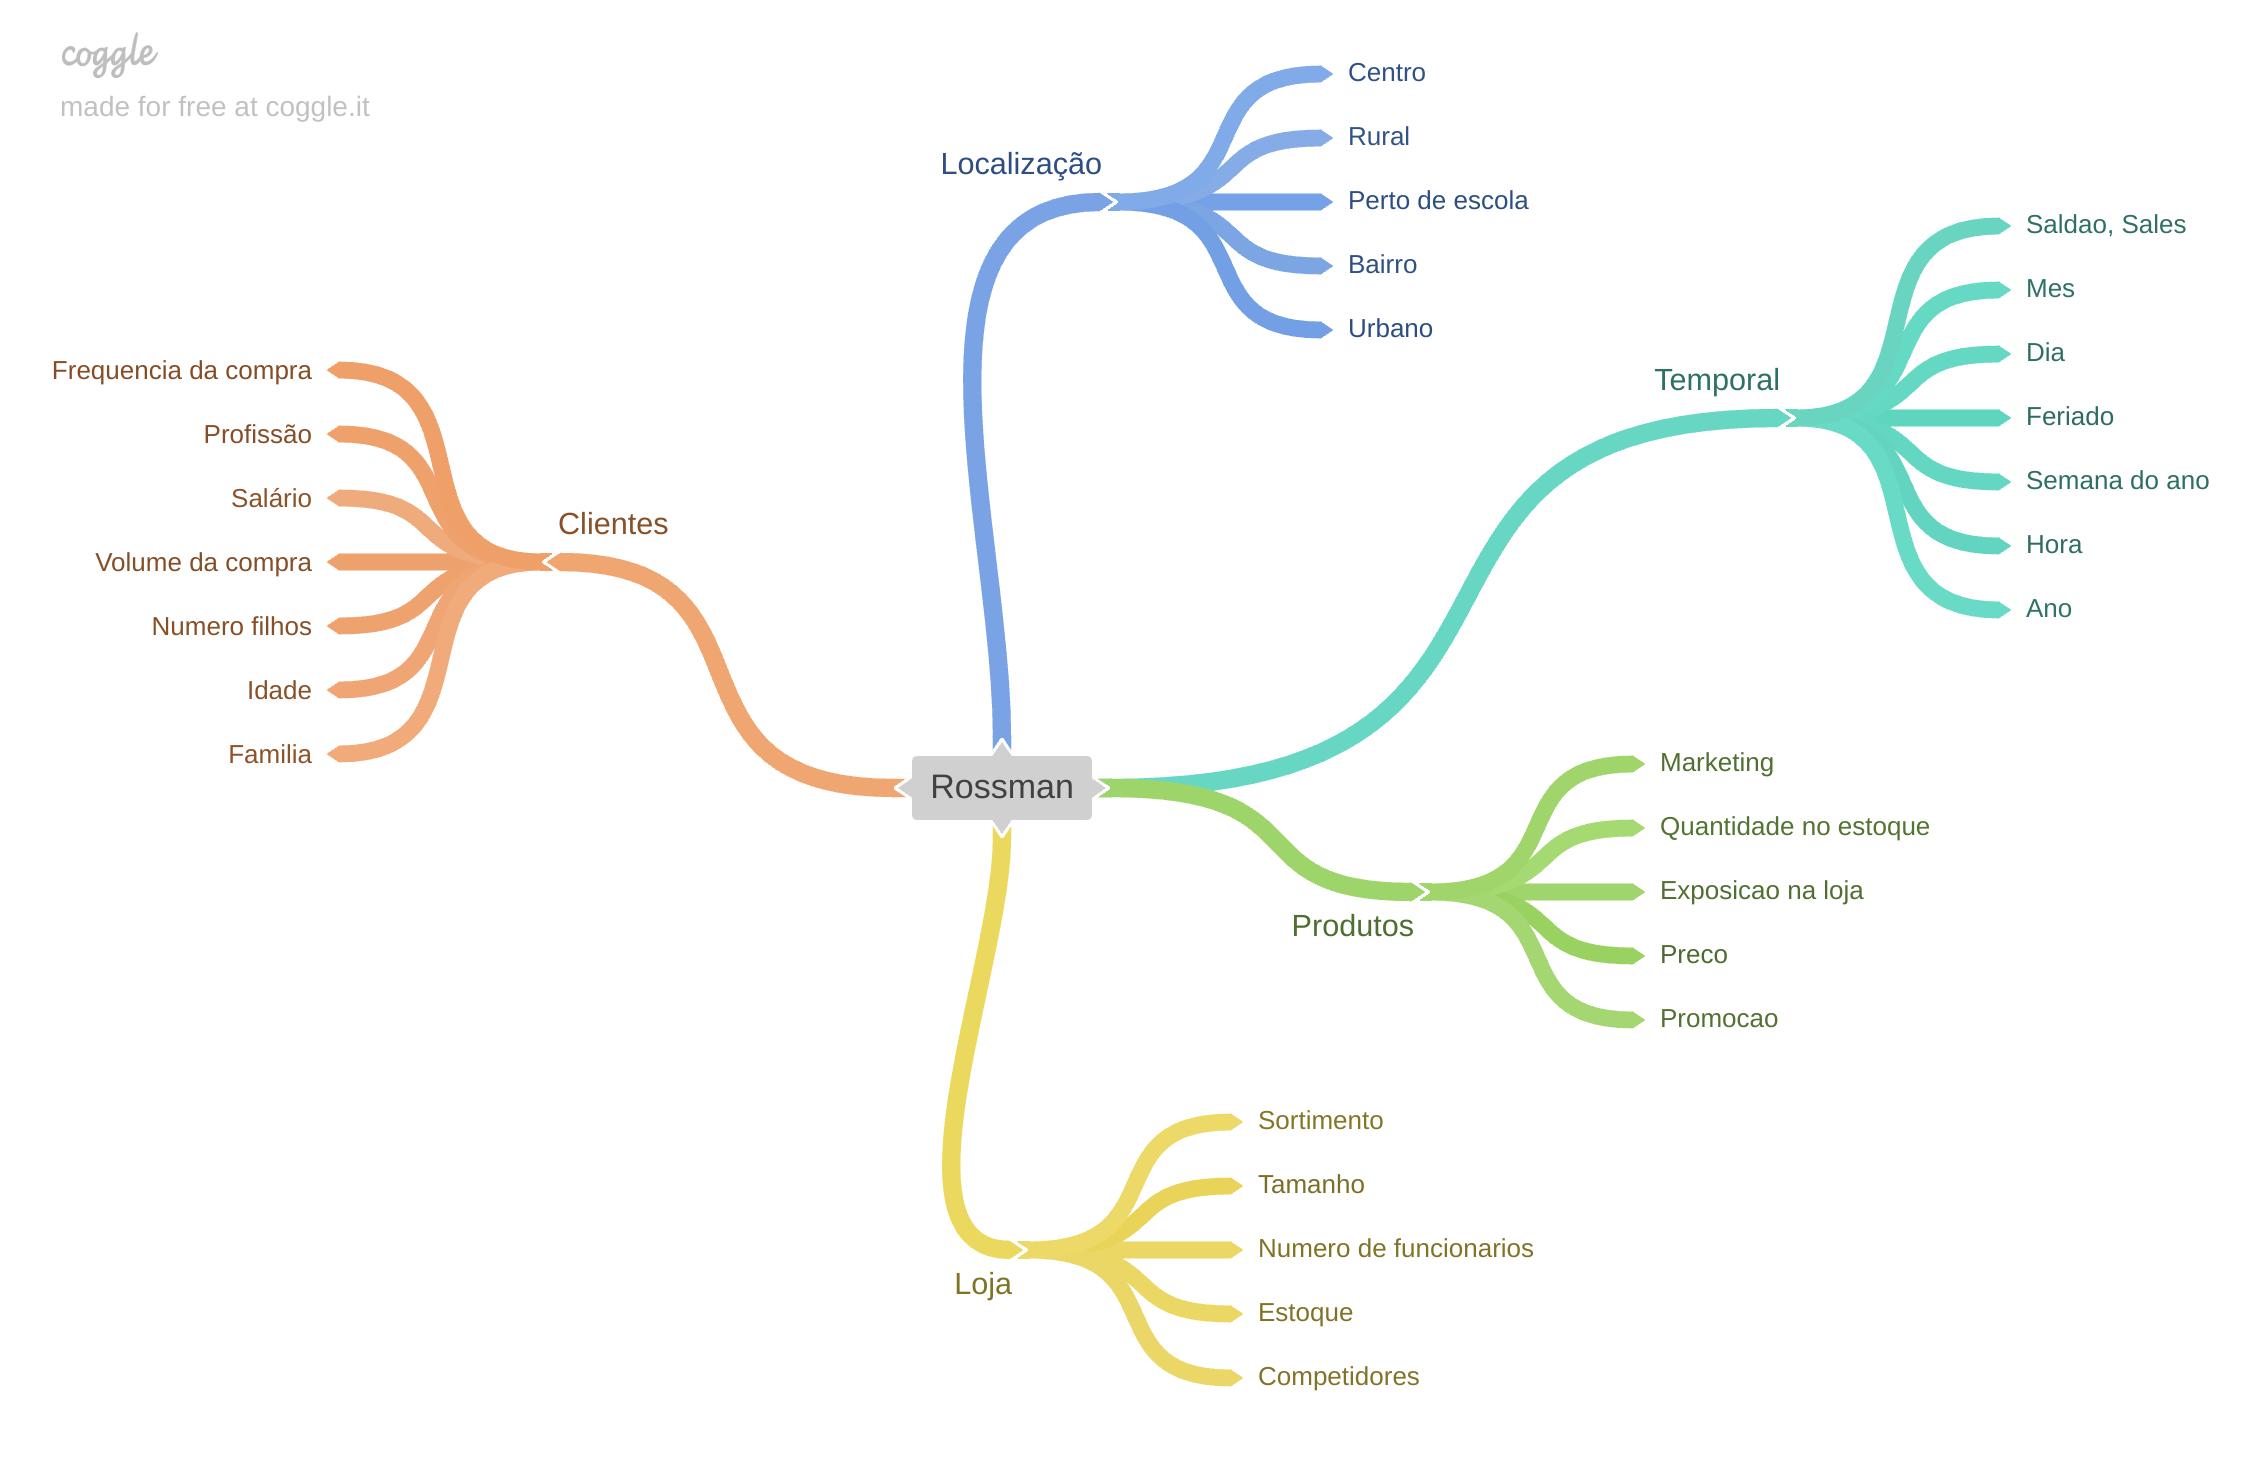

In [111]:
Image("images/Rossman-mindmap.png")

## 2.2 Criação das Hipoteses

### 2.2.1 Hipoteses Loja

1. Lojas com número maior de funcionários deveriam vender mais.
2. Lojas com maior capacidade de estoque deveriam vender mais.
3. Lojas com maior porte deveriam vender mais.
4. Lojas com maior sortimentos deveriam vender mais.
5. Lojas com competidores mais próximos deveriam vender menos.
6. Lojas com competidores à mais tempo deveriam vendem mais.

### 2.2.2 Hipoteses de produto

1. Lojas que investem mais em Marketing deveriam vender mais.
2. Lojas com maior exposição de produto deveriam vender mais.
3. Lojas com produtos com preço menor deveriam vender mais.
5. Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.
6. Lojas com promoções ativas por mais tempo deveriam vender mais.
7. Lojas com mais dias de promoção deveriam vender mais.
8. Lojas com mais promoções consecutivas deveriam vender mais.

### 2.2.3 Hipoteses sobre o tempo

1. Lojas abertas durante o feriado de Natal deveriam vender mais.
2. Lojas deveriam vender mais ao longo dos anos.
3. Lojas deveriam vender mais no segundo semestre do ano.
4. Lojas deveriam vender mais depois do dia 10 de cada mês.
5. Lojas deveriam vender menos aos finais de semana.
6. Lojas deveriam vender menos durante os feriados escolares.

## 2.3 Lista final de hipoteses

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais

**2.** Lojas com competidores mais próximos deveriam vender menos

**3.** Lojas com competidores a mais tempo deveriam vender mais

**4.** Lojas com promoções ativas a mais tempo deveriam vender mais

**5.** Lojas com promoções consecutivas deveriam vender mais

**6.** Lojas abertas durante o natal deveriam vender mais

**7.** Lojas deveriam vender mais ao longo dos anos

**8.** Lojas deveriam vender mais no segundo semestre do ano

**9.** Lojas deveriam vender mais depois do dia 10 de cada mês

**10.** Lojas deveriam vender menos aos finais de semana

**11.** Lojas deveriam vender menos durante feriados escolares

## 2.5 Derivação de features

In [158]:
# Ano
df2['year'] = df2['date'].dt.year

# Mês
df2['month'] = df2['date'].dt.month

# Dia
df2['day'] = df2['date'].dt.day

# Semana do ano
df2['week_of_year'] = df2['date'].dt.isocalendar().week

#ano e semana
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )

#competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year = x['competition_open_since_year'], month=x['competition_open_since_month'], day=1),axis=1)
df2['competition_time_month'] = ( (df2['date'] - df2['competition_since'])/30 ).apply(lambda x: x.days).astype( int )

#promo since
df2['promo_since']=df2["promo2_since_year"].astype(str) + '-' + df2["promo2_since_week"].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime( x + '-1', "%Y-%W-%w") - datetime.timedelta(days=7))
df2['promo_time_week'] = ((df2["date"] - df2["promo_since"])/7).apply(lambda x: x.days).astype(int)

#assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x =='b' else 'extended')

#state holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x== 'b' else 'christmas' if x == 'c' else 'regular_day')

In [160]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0 Filtragem de variaveis
pensar nas restrições de negócios antes de dar deploy no projeto

In [165]:
df3 = df2.copy()

## 3.1 Filtragem das linhas

In [171]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


- open: deve ser diferente de 0
- sales: deve ser maior do que 0

In [173]:
df3 = df3[(df3['open'] != 0 ) & (df3['sales'] > 0)]

## 3.2 Seleção das colunas

- customers: removido pois não podemos saber quantos customers estarão na loja nas próximas 6 
- open: depois do filtro so vai ter um valor
- promo_interval: coluna auxiliar
- month_map: coluna auxiliar

In [175]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop(cols_drop, axis=1)